# **Import all needed libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from matplotlib import gridspec
from tensorflow import keras # for Neural Networks
from keras.models import Sequential # for linear layers for Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for regular densely-connected NN layers.
from sklearn.model_selection import train_test_split # splitting data
import warnings 
warnings.filterwarnings('ignore')



# **Import dataset**

In [35]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# **Data preprocessing and EDA( Exploratory Data Analysis)**

In [36]:
### check each column types  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [38]:
# Spread of the data 
data.describe(include = 'O')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
# check dataset dimensions 
data.shape

(8124, 23)

In [40]:
# check columns names
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [41]:
#  Here we check the missing value of each column in our dataset 
miss_per = data.isnull().sum() / data.shape[0] * 100
miss_per

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [42]:
## Check unique values of each column
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

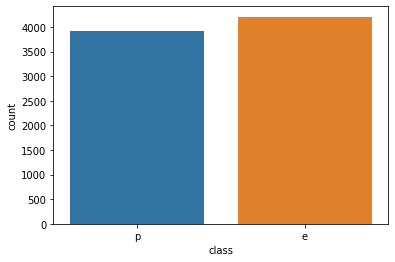

In [43]:
sns.countplot(data["class"])

<Figure size 1152x576 with 0 Axes>

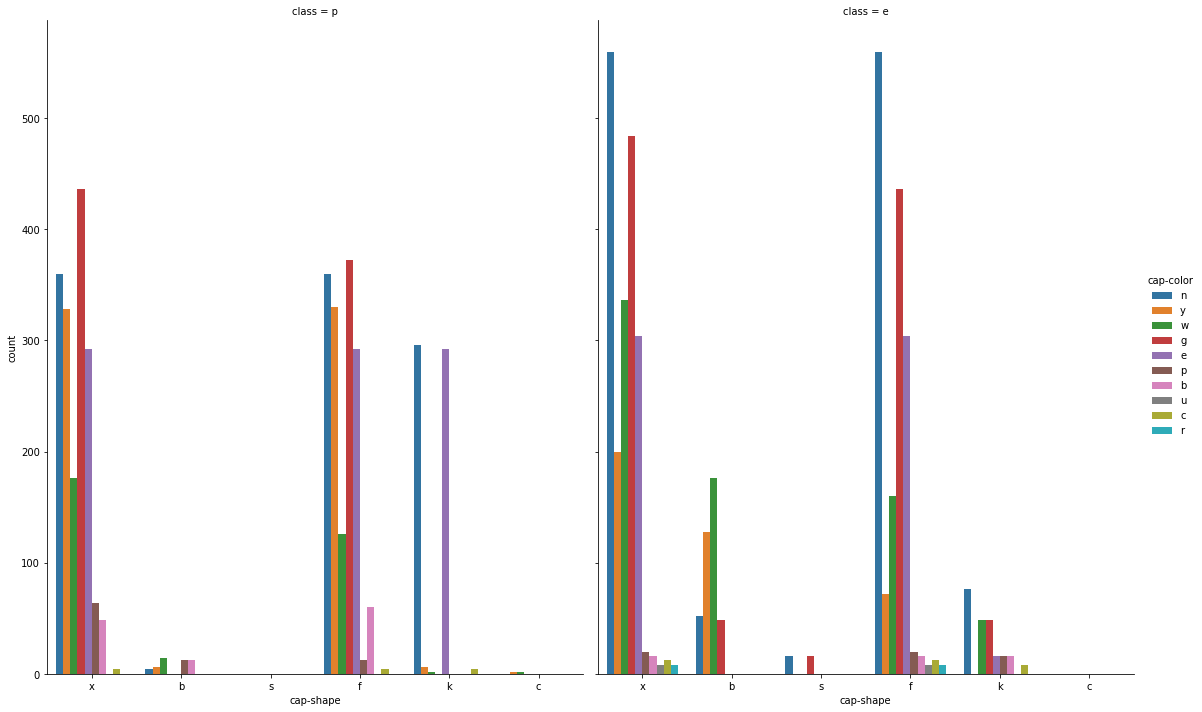

In [44]:
# Check the each edible and poisonus values using histogram

plt.figure(figsize = (16,8))
gr = sns.catplot(x="cap-shape", hue="cap-color", col="class", data = data, kind="count", height=10, aspect=.8);
  

# **Label Encoding**


There was two classes. the "p" has been converted as 1 and "e" has been converted as 0.

In [45]:

# Label Encoding refers to converting the labels into a numeric.
# Here we convert from alphabet to numbers 

le = LabelEncoder()
for i in data.columns:
  data[i] = le.fit_transform(data[i])

In [46]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


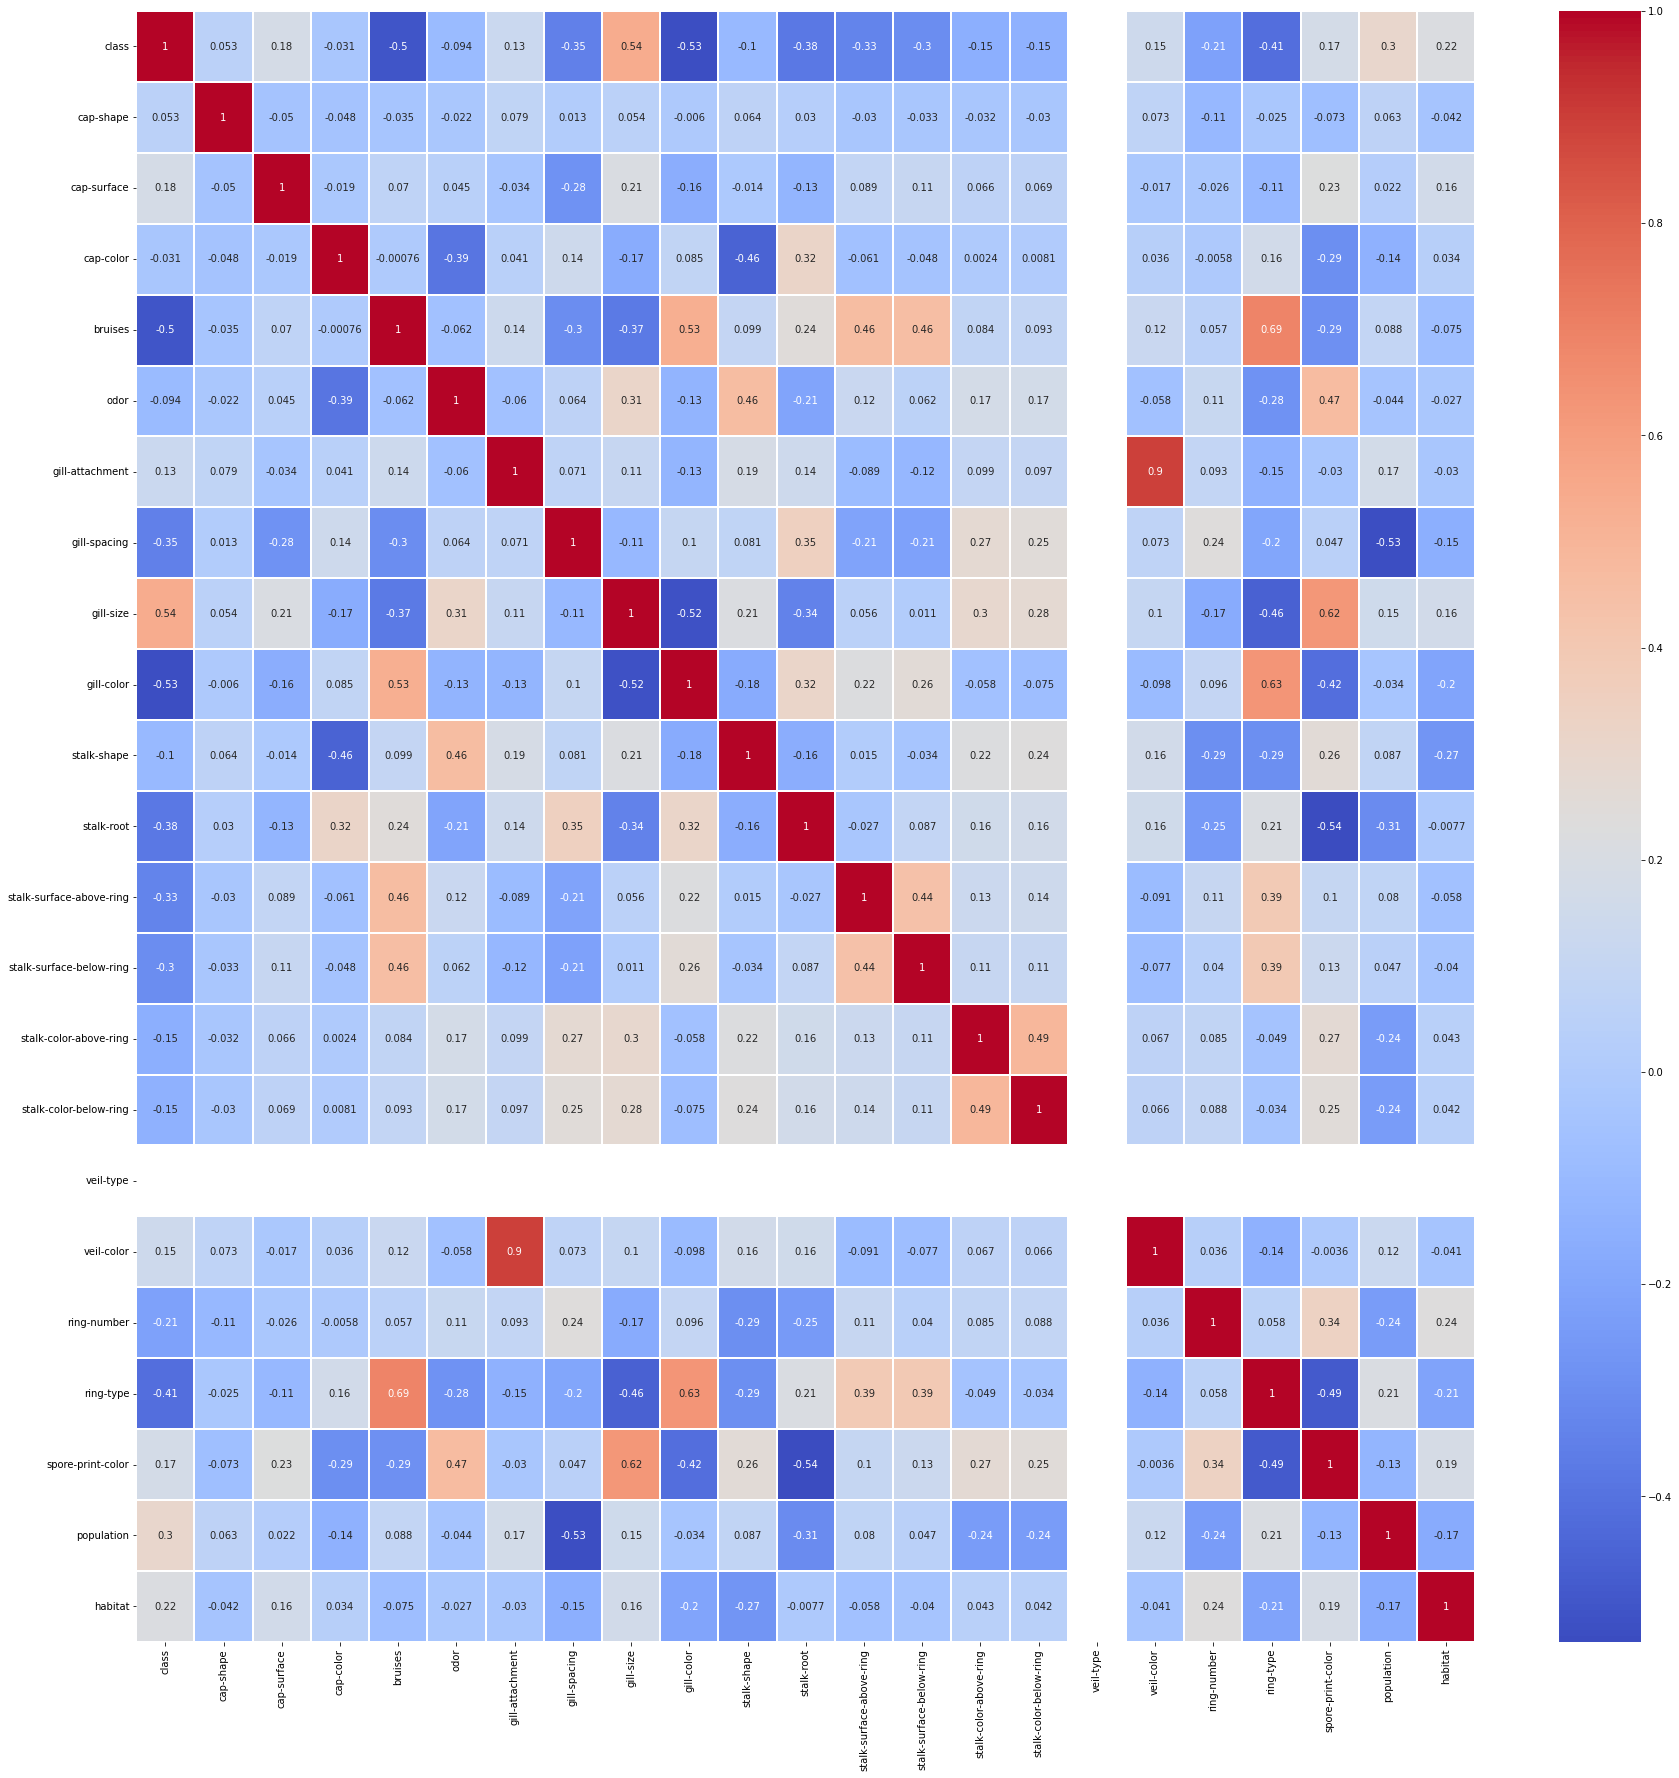

In [18]:
# correlation checking between each column using heatmap
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(data.corr(),cmap = 'coolwarm',ax = ax,annot = True, linewidths = 1)

In [19]:
# check value count of class in each feature
for i in data.drop(columns = 'class').columns:
  fig = px.pie(data,values = data[i], names = data['class'], height = 400
               ,title = i)
  fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
  fig.show()

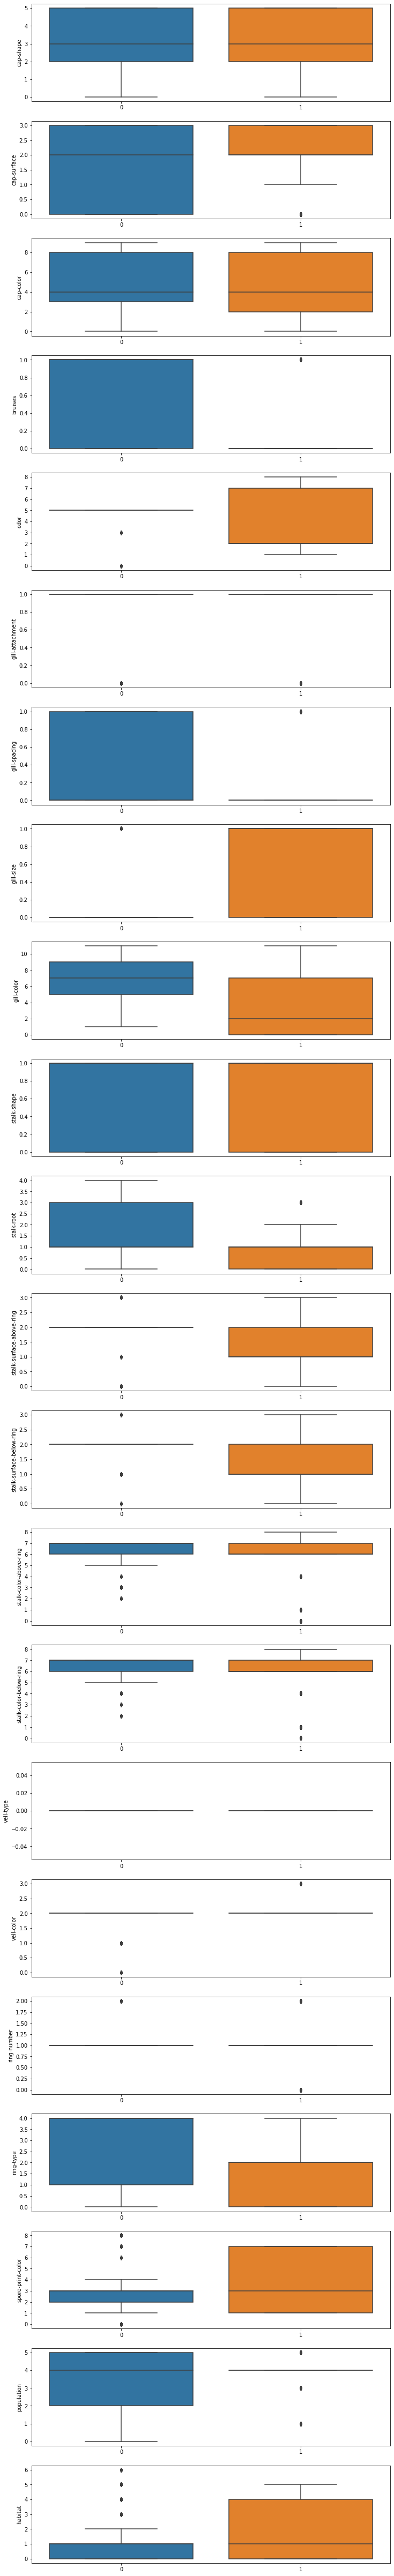

In [47]:

# Boxplot is a 5 point summary plot. It gives the information about the maximum, minimum, mean, 

features = data.iloc[:,1:].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
  ax = plt.subplot(gs[i])
  sns.boxplot(y = data[c],x = data['class'])
  ax.set_xlabel('')

# **Creating dependent And independent Variable for models**

In [48]:
# Taking all columns as independent except those column that we have to predict and that is class
X = data.drop(columns=['class'])
y = data['class']

# **Spliting the dataset into training and testing**

In [49]:
# split data 80% for the training our model and 20%  for testing our model
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [50]:
x_train.shape

(6499, 22)

# **feed forward neural network**

In [51]:
print('Tensorflow/Keras: %s' % keras.__version__) # print version

Tensorflow/Keras: 2.9.0


In [53]:
# Specify the structure of a Neural Network
model = Sequential(name = "Model-with-One-Input")
model.add(Input(shape = (22,), name = 'Input-Layer'))
model.add(Dense(6, activation = 'softplus', name = 'Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation = 'sigmoid', name = 'Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))


# Compile keras model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy', 'Precision', 'Recall'],
              loss_weights = None, weighted_metrics = None, run_eagerly = None, steps_per_execution = None)

# keras model on the dataset
model_history = model.fit(x_train, y_train, batch_size = 10, epochs = 15, verbose = 'auto', callbacks = None, 
          validation_split = 0.5, validation_data = (x_test, y_test), shuffle = True, class_weight = {0 : 0.3, 1 : 0.7},
          sample_weight = None, initial_epoch = 0, validation_steps = None, validation_batch_size = None, max_queue_size = 10, 
          workers = 1)


# Use model predictions
# Predict class labels on training data
pred_labels_tr = (model.predict(x_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(x_test) > 0.5).astype(int)


# Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

Epoch 1/15
650/650 [==============================] - 3s 3ms/step - loss: 0.2686 - Accuracy: 0.6823 - precision: 0.6437 - recall: 0.7681 - val_loss: 0.3902 - val_Accuracy: 0.8289 - val_precision: 0.8194 - val_recall: 0.8215
Epoch 2/15
650/650 [==============================] - 2s 3ms/step - loss: 0.1485 - Accuracy: 0.8567 - precision: 0.8445 - recall: 0.8626 - val_loss: 0.2996 - val_Accuracy: 0.8892 - val_precision: 0.8674 - val_recall: 0.9056
Epoch 3/15
650/650 [==============================] - 2s 4ms/step - loss: 0.1146 - Accuracy: 0.9069 - precision: 0.8983 - recall: 0.9106 - val_loss: 0.2059 - val_Accuracy: 0.9298 - val_precision: 0.9318 - val_recall: 0.9198
Epoch 4/15
650/650 [==============================] - 3s 5ms/step - loss: 0.0885 - Accuracy: 0.9377 - precision: 0.9212 - recall: 0.9526 - val_loss: 0.1648 - val_Accuracy: 0.9563 - val_precision: 0.9512 - val_recall: 0.9573
Epoch 5/15
650/650 [==============================] - 2s 3ms/step - loss: 0.0711 - Accuracy: 0.9546 - pr

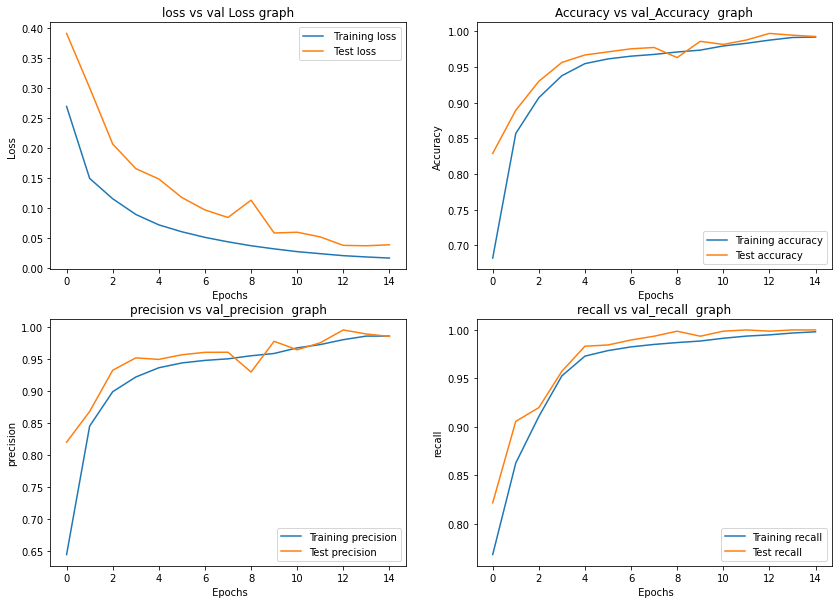

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(range(15), model_history.history['loss'], label=" Training loss")
plt.plot(range(15), model_history.history['val_loss'], label=" Test loss")
plt.xlabel(" Epochs")
plt.ylabel("Loss")
plt.title("loss vs val Loss graph")
plt.legend()


plt.subplot(2,2,2)
plt.plot(range(15), model_history.history['Accuracy'], label="Training accuracy")
plt.plot(range(15), model_history.history['val_Accuracy'], label="Test accuracy")
plt.xlabel(" Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs val_Accuracy  graph")
plt.legend()


plt.subplot(2,2,3)
plt.plot(range(15), model_history.history['precision'], label="Training precision")
plt.plot(range(15), model_history.history['val_precision'], label="Test precision")
plt.xlabel(" Epochs")
plt.ylabel("precision")
plt.title("precision vs val_precision  graph")
plt.legend()


plt.subplot(2,2,4)
plt.plot(range(15), model_history.history['recall'], label="Training recall",)
plt.plot(range(15), model_history.history['val_recall'], label="Test recall")
plt.xlabel(" Epochs")
plt.ylabel("recall")
plt.title("recall vs val_recall  graph")
plt.legend()



